In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix,coo_matrix
import helper
print(pd.__version__)

2.2.2


In [4]:
movies=pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings=pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
print('The dataset contains: ',len(ratings),'ratings of',len(movies),'movies.')

The dataset contains:  100836 ratings of 9742 movies.


In [7]:
genre_ratings=helper.get_genre_ratings(ratings,movies,['Romance','Sci-Fi'],['avg_romance_rating','avg_scifi_rating'])
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating
1,4.31,4.22
2,4.50,3.88
3,0.50,4.20
4,3.38,2.83
5,3.09,2.50


In [8]:
biased_dataset=helper.bias_genre_rating_dataset(genre_ratings,3.2,2.5)
print('Number of records: ',len(biased_dataset))
biased_dataset.head()

Number of records:  162


,index,avg_romance_rating,avg_scifi_rating
0,3,0.50,4.20
1,4,3.38,2.83
2,5,3.09,2.50
3,7,2.65,3.15
4,9,3.17,3.00


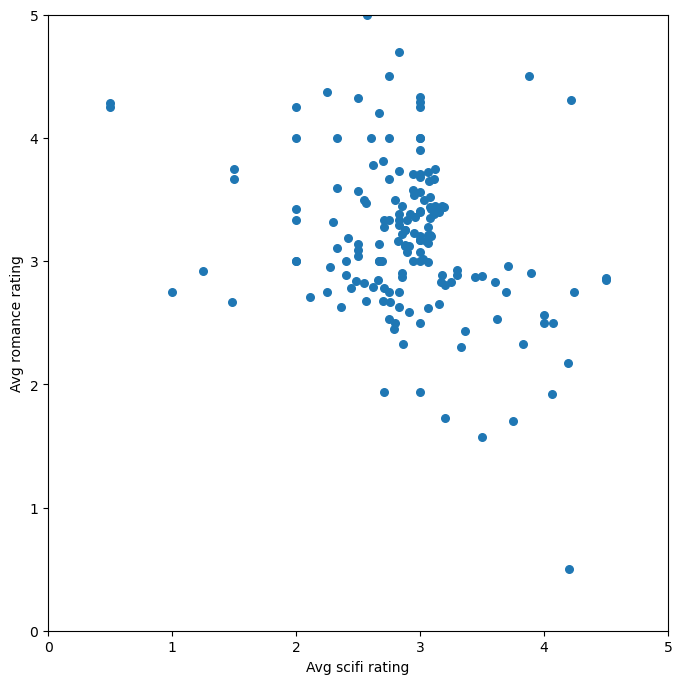

In [9]:
%matplotlib inline
helper.draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating',biased_dataset['avg_romance_rating'],'Avg romance rating')

In [10]:
X=biased_dataset[['avg_scifi_rating','avg_romance_rating']].values
print(X)

[[4.2  0.5 ]
 [2.83 3.38]
 [2.5  3.09]
 [3.15 2.65]
 [3.   3.17]
 [2.   3.33]
 [2.56 2.68]
 [2.   3.  ]
 [3.18 2.89]
 [3.   3.56]
 [2.33 3.11]
 [3.   3.68]
 [2.3  3.32]
 [3.11 3.38]
 [2.85 2.9 ]
 [2.55 2.82]
 [3.   3.17]
 [3.15 3.4 ]
 [2.95 3.23]
 [3.2  1.73]
 [3.03 3.5 ]
 [3.83 2.33]
 [2.   4.  ]
 [3.71 2.96]
 [3.33 2.3 ]
 [2.83 4.7 ]
 [2.83 3.29]
 [2.92 3.38]
 [2.7  3.81]
 [2.88 3.25]
 [4.19 2.17]
 [3.89 2.9 ]
 [3.19 3.44]
 [4.   2.5 ]
 [3.   3.41]
 [2.67 4.2 ]
 [1.   2.75]
 [3.09 3.42]
 [2.88 3.13]
 [2.62 3.78]
 [3.   4.  ]
 [3.12 3.45]
 [3.   3.71]
 [2.75 3.33]
 [2.88 3.25]
 [4.5  2.86]
 [2.75 4.  ]
 [1.48 2.67]
 [3.   2.5 ]
 [2.42 3.19]
 [2.48 2.84]
 [2.5  3.14]
 [3.44 2.87]
 [2.25 4.37]
 [0.5  4.28]
 [3.08 3.52]
 [2.5  3.04]
 [3.07 3.65]
 [2.5  3.57]
 [3.   4.29]
 [2.33 3.59]
 [3.05 3.16]
 [2.67 3.  ]
 [2.75 2.75]
 [3.   3.9 ]
 [2.91 2.59]
 [2.75 3.67]
 [3.02 3.02]
 [3.3  2.93]
 [3.06 2.62]
 [2.94 3.58]
 [2.   4.25]
 [3.5  1.57]
 [3.08 3.44]
 [4.5  2.85]
 [3.62 2.53]
 [3.   3.4 ]

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


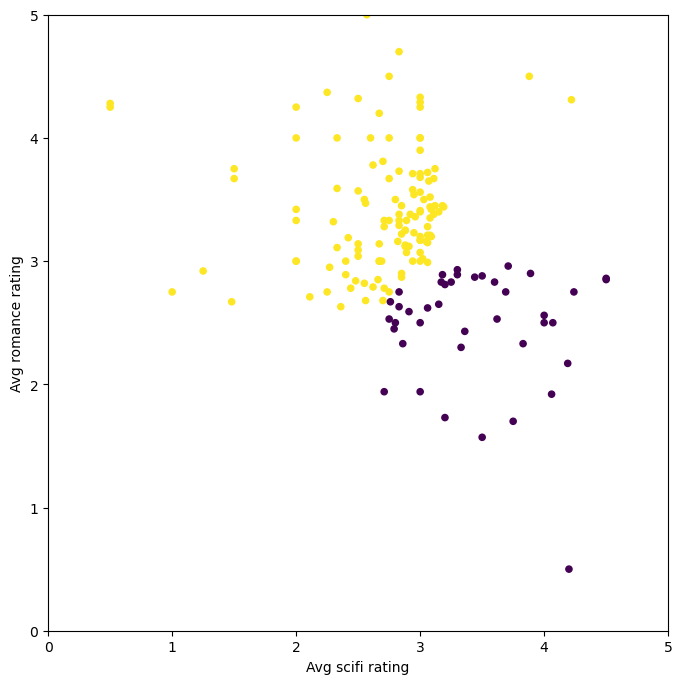

In [12]:
from sklearn.cluster import KMeans
kmeans_1=KMeans(n_clusters=2,n_init='auto')
predictions=kmeans_1.fit_predict(X)
helper.draw_clusters(biased_dataset,predictions)

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


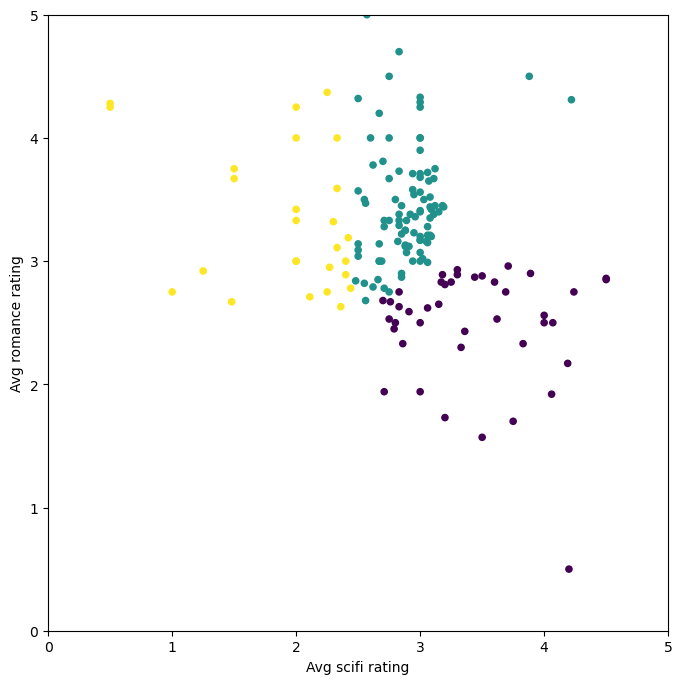

In [13]:
kmeans_2=KMeans(n_clusters=3,n_init='auto')
predictions_2=kmeans_2.fit_predict(X)
helper.draw_clusters(biased_dataset,predictions_2)

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


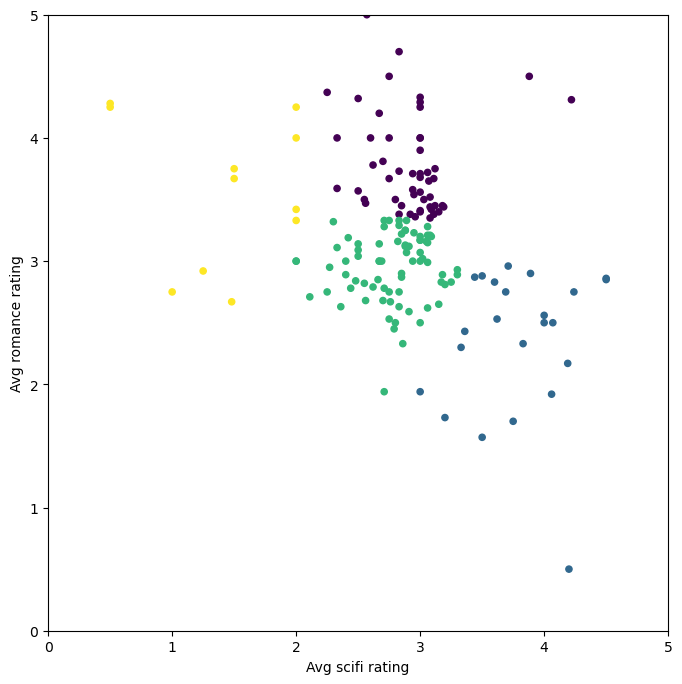

In [14]:
kmeans_3=KMeans(n_clusters=4,n_init='auto')
predictions_3=kmeans_3.fit_predict(X)
helper.draw_clusters(biased_dataset,predictions_3)

In [15]:
print(len(X))
possible_k_values=range(2,len(X),5)
errors_per_k=[helper.clustering_errors(k,X) for k in possible_k_values]

162


d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\a

In [16]:
list(zip(possible_k_values,errors_per_k))

[(2, 0.37651376343962917),
 (7, 0.3815418769017645),
 (12, 0.35640627890816257),
 (17, 0.375411777278347),
 (22, 0.37988257297545647),
 (27, 0.4207500427759231),
 (32, 0.41450842768893664),
 (37, 0.42464907732378826),
 (42, 0.42508087484040014),
 (47, 0.39964748148647866),
 (52, 0.407268514931236),
 (57, 0.40683790071436193),
 (62, 0.403265753721693),
 (67, 0.3919744338801377),
 (72, 0.40293292892040167),
 (77, 0.38946341144521546),
 (82, 0.36445268120919483),
 (87, 0.3683780296073553),
 (92, 0.3374011849865399),
 (97, 0.3294873317233412),
 (102, 0.3006319374446609),
 (107, 0.2907196280730565),
 (112, 0.276326287800426),
 (117, 0.2634462196851696),
 (122, 0.2507467259441654),
 (127, 0.23240348838158786),
 (132, 0.20965140738154706),
 (137, 0.19536421055750156),
 (142, 0.17457050452989348),
 (147, 0.13831784871759661),
 (152, 0.10678588096577339),
 (157, 0.06172839506172839)]

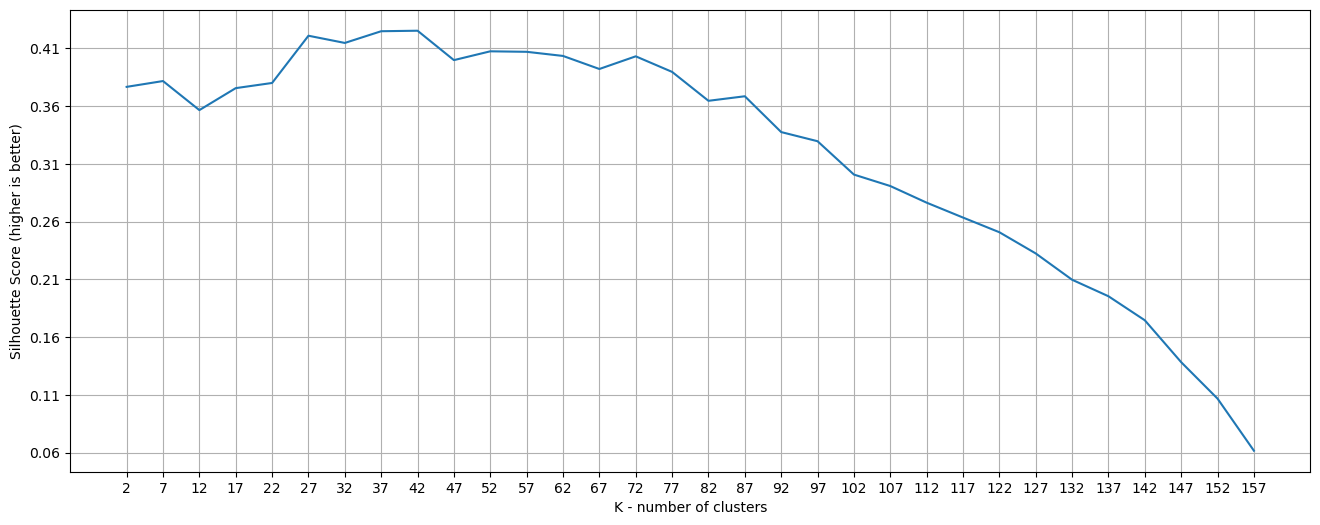

In [17]:
fig,ax=plt.subplots(figsize=(16,6))
ax.set_xlabel('K - number of clusters')
ax.set_ylabel('Silhouette Score (higher is better)')
ax.plot(possible_k_values,errors_per_k)

xticks=np.arange(min(possible_k_values),max(possible_k_values)+1,5.0)
ax.set_xticks(xticks,minor=False)
ax.set_xticks(xticks,minor=True)
ax.xaxis.grid(True,which='both')
yticks=np.arange(round(min(errors_per_k),2),max(errors_per_k),.05)
ax.set_yticks(yticks,minor=False)
ax.set_yticks(yticks,minor=True)
ax.yaxis.grid(True,which='both')

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


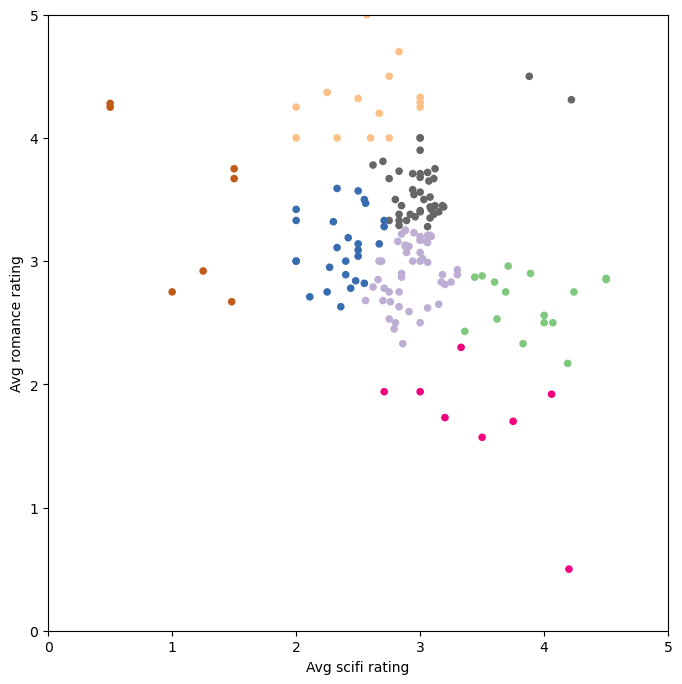

In [18]:
kmeans_4=KMeans(n_clusters=7,n_init='auto')
predictions_4=kmeans_4.fit_predict(X)
helper.draw_clusters(biased_dataset,predictions_4,cmap='Accent')

In [19]:
biased_dataset_3_genres=helper.get_genre_ratings(ratings,movies,['Romance','Sci-Fi','Action'],['avg_romance_rating','avg_scifi_rating','avg_action_rating'])
biased_dataset_3_genres=helper.bias_genre_rating_dataset(biased_dataset_3_genres,3.2,3.5).dropna()
print("Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

Number of records:  55


,index,avg_romance_rating,avg_scifi_rating,avg_action_rating
0,3,0.50,4.20,3.57
1,35,3.56,3.00,4.00
2,40,3.68,3.00,3.52
3,81,2.33,3.83,2.77
4,85,4.00,2.00,1.00


In [20]:
ratings_title= pd.merge(ratings,movies[['movieId','title']],on='movieId')
user_movie_ratings=pd.pivot_table(ratings_title,index='userId',columns='title',values='rating')
print('dataset dimensions: ',user_movie_ratings.shape,'\n\nSubset example:')
user_movie_ratings.iloc[:6,:10]

dataset dimensions:  (610, 9719) 

Subset example:


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
n_movies=30
n_users=18
most_rated_movies_users_selection = helper.sort_by_rating_density(user_movie_ratings,n_movies,n_users)
print('dataset dimensions: ',most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()

dataset dimensions:  (18, 30)


title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,Star Wars: Episode VI - Return of the Jedi (1983),"Godfather, The (1972)","Fugitive, The (1993)",Batman (1989),Saving Private Ryan (1998),"Lord of the Rings: The Two Towers, The (2002)","Lord of the Rings: The Return of the King, The (2003)",Aladdin (1992),Fargo (1996),"Sixth Sense, The (1999)"
413,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,...,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,3.0
589,5.0,4.5,4.5,3.5,4.0,5.0,4.0,4.0,4.5,5.0,...,4.5,5.0,4.0,3.5,4.0,5.0,4.5,4.0,4.0,3.5
473,3.0,5.0,4.0,4.5,4.5,4.0,4.5,3.0,4.0,5.0,...,4.0,5.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0,5.0
479,5.0,5.0,4.0,4.5,5.0,4.5,5.0,5.0,4.5,5.0,...,3.5,5.0,3.5,4.5,4.5,4.5,4.0,4.0,4.0,4.0
67,3.5,3.0,2.0,3.5,4.5,5.0,3.5,2.5,3.5,4.0,...,5.0,4.0,4.5,4.0,4.0,4.0,4.5,3.5,2.5,2.5


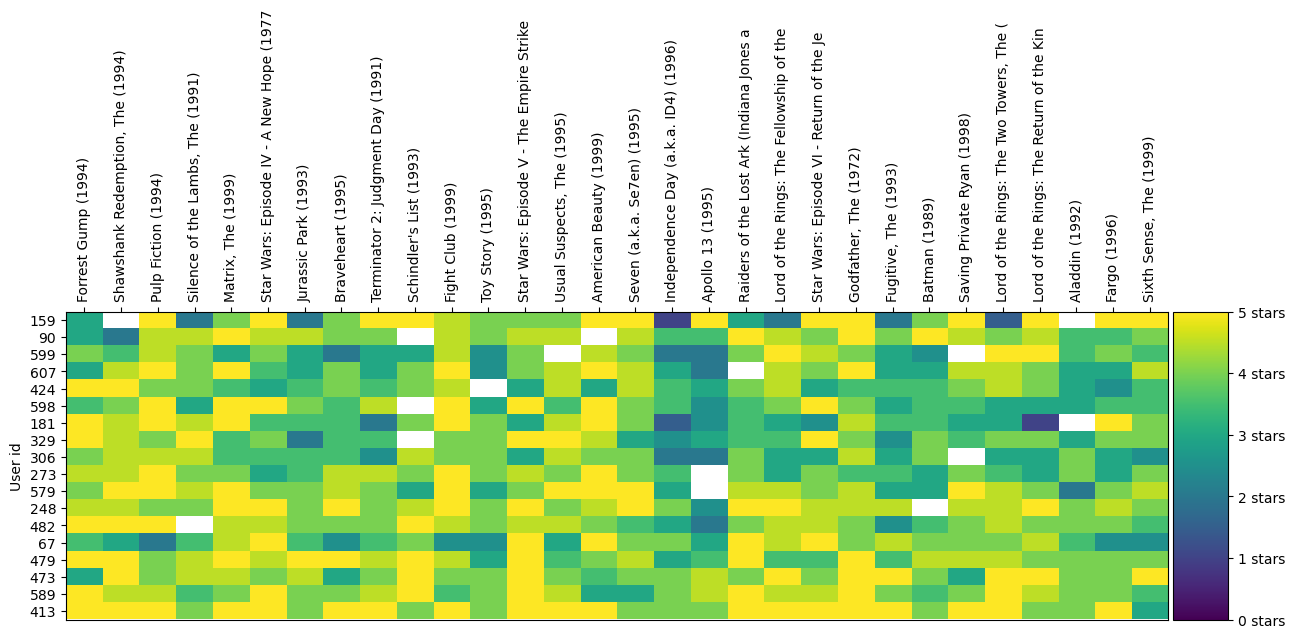

In [22]:
helper.draw_movies_heatmap(most_rated_movies_users_selection)

In [23]:
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = helper.get_most_rated_movies(user_movie_ratings, 1000)


In [24]:
sparse_ratings_filled = most_rated_movies_1k.copy()
sparse_ratings_filled[np.isnan(sparse_ratings_filled)] = 0
sparse_ratings = csr_matrix(sparse_ratings_filled.values)
#print(most_rated_movies_1k)
print(sparse_ratings)

  (0, 0)	4.0
  (0, 2)	3.0
  (0, 3)	4.0
  (0, 4)	5.0
  (0, 5)	5.0
  (0, 6)	4.0
  (0, 7)	4.0
  (0, 9)	5.0
  (0, 10)	5.0
  (0, 11)	4.0
  (0, 12)	5.0
  (0, 13)	5.0
  (0, 14)	5.0
  (0, 15)	5.0
  (0, 16)	3.0
  (0, 18)	5.0
  (0, 20)	5.0
  (0, 22)	5.0
  (0, 23)	4.0
  (0, 24)	4.0
  (0, 28)	5.0
  (0, 33)	5.0
  (0, 36)	5.0
  (0, 37)	3.0
  (0, 38)	4.0
  :	:
  (609, 932)	5.0
  (609, 936)	4.0
  (609, 938)	4.0
  (609, 941)	4.0
  (609, 942)	3.5
  (609, 944)	3.5
  (609, 946)	3.0
  (609, 947)	4.5
  (609, 955)	4.5
  (609, 957)	1.5
  (609, 958)	4.0
  (609, 963)	3.5
  (609, 966)	4.0
  (609, 967)	2.5
  (609, 969)	4.0
  (609, 973)	3.0
  (609, 974)	4.5
  (609, 975)	5.0
  (609, 977)	5.0
  (609, 978)	5.0
  (609, 984)	4.0
  (609, 986)	3.0
  (609, 989)	4.5
  (609, 990)	2.5
  (609, 994)	3.5


In [25]:
# 20 clusters
predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_ratings)


d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


cluster # 3
# of users in cluster: 13. # of users in plot: 13


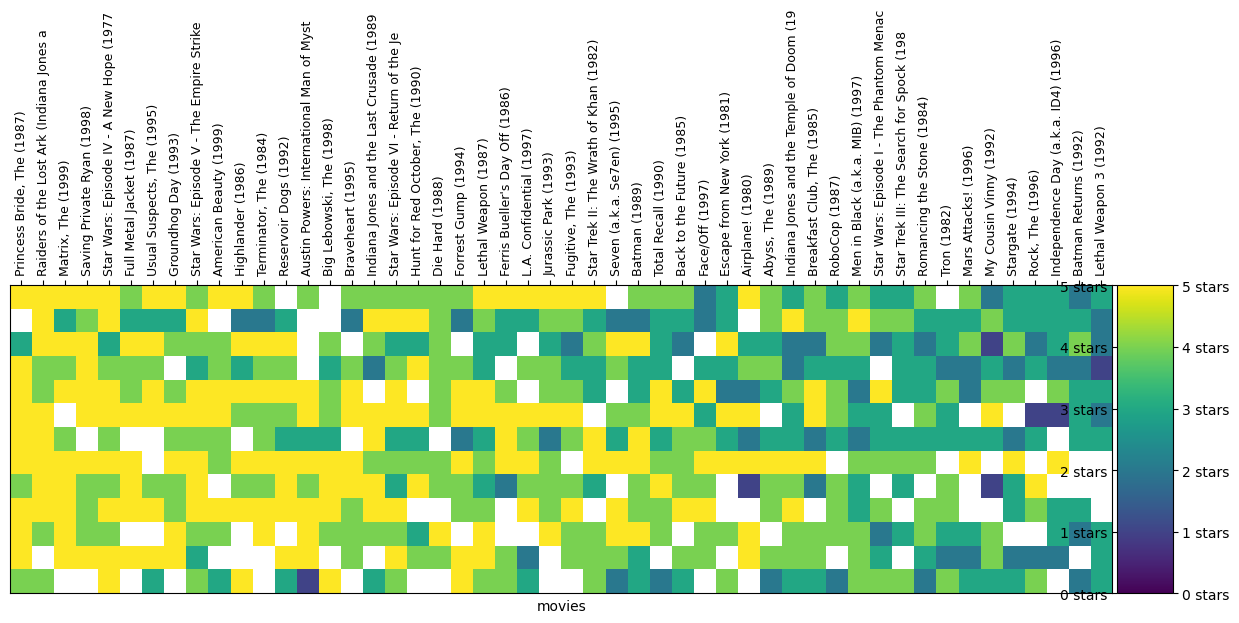

cluster # 13
# of users in cluster: 243. # of users in plot: 70


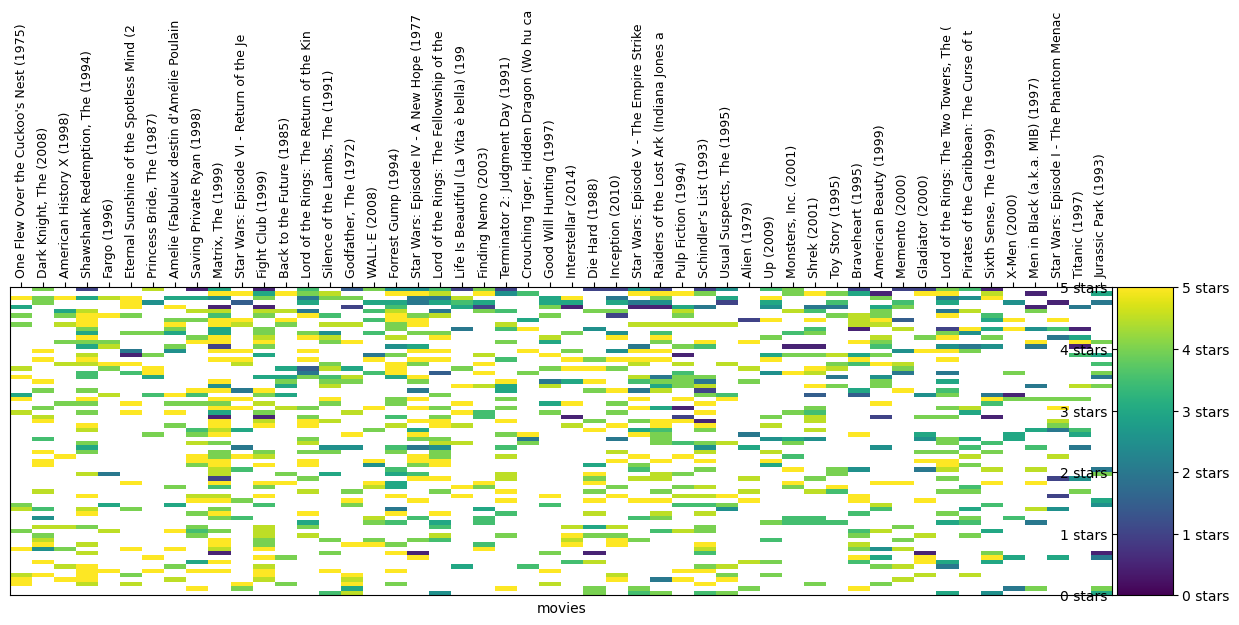

cluster # 16
# of users in cluster: 60. # of users in plot: 60


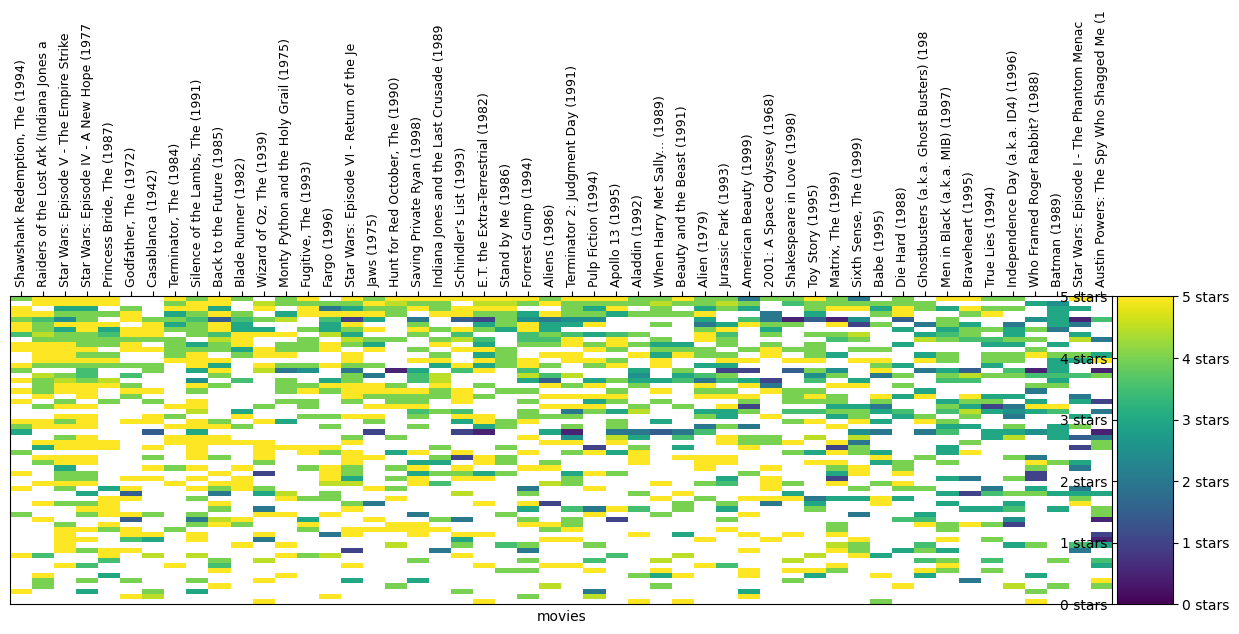

cluster # 14
# of users in cluster: 58. # of users in plot: 58


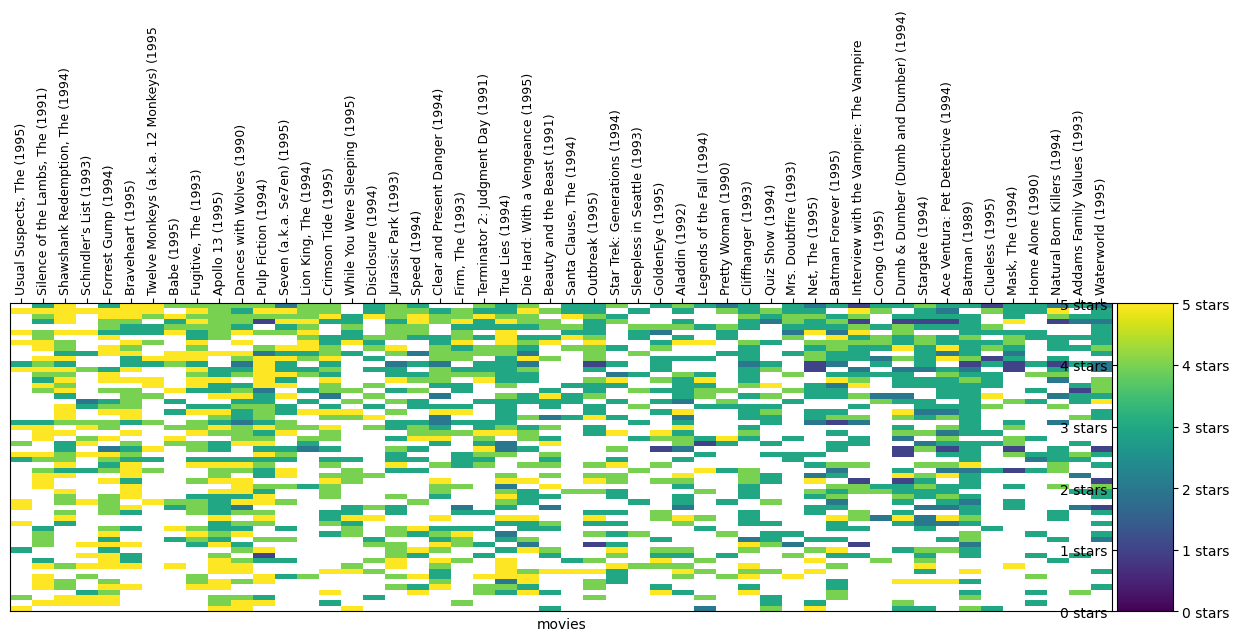

cluster # 5
# of users in cluster: 36. # of users in plot: 36


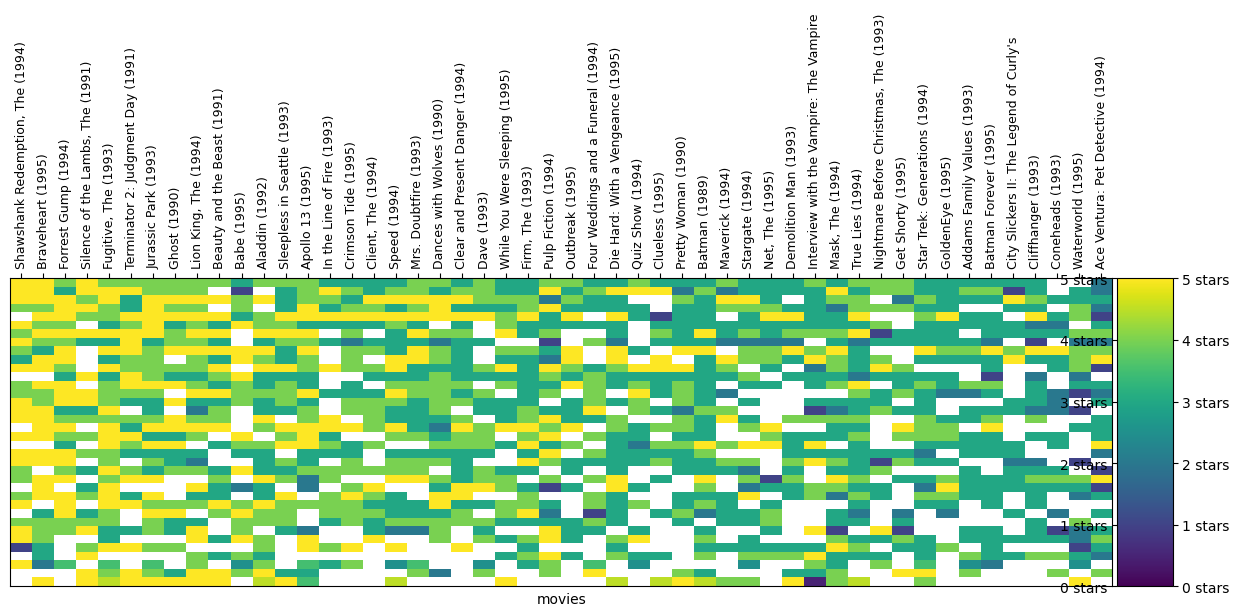

cluster # 0
# of users in cluster: 79. # of users in plot: 70


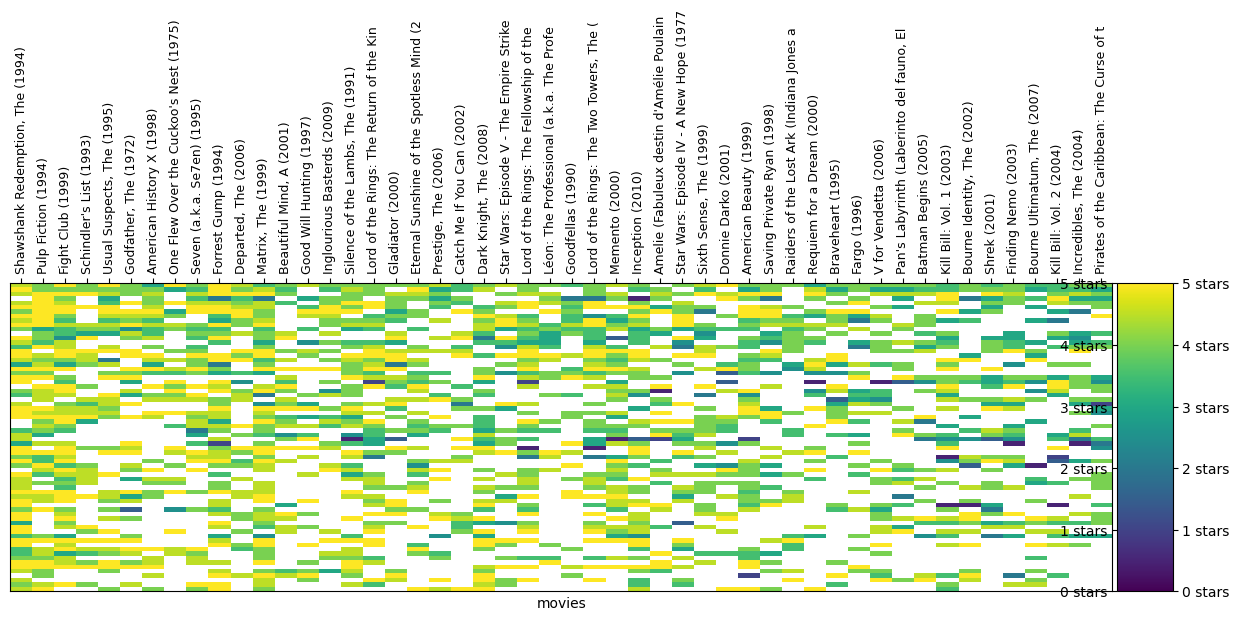

cluster # 1
# of users in cluster: 29. # of users in plot: 29


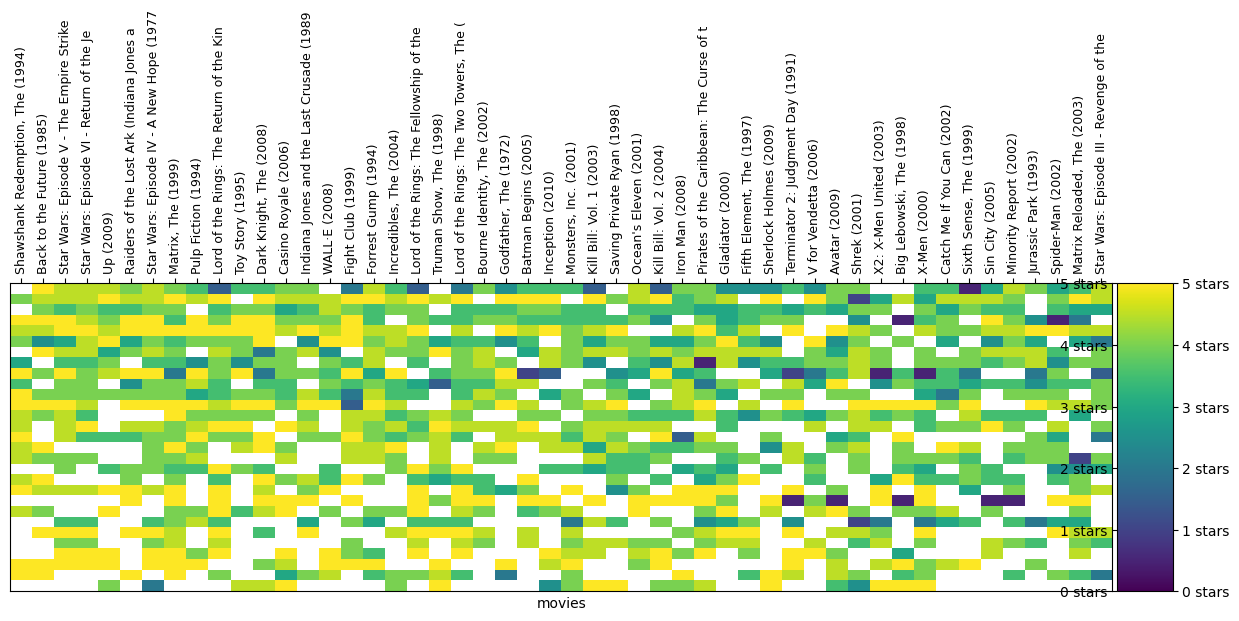

cluster # 8
# of users in cluster: 30. # of users in plot: 30


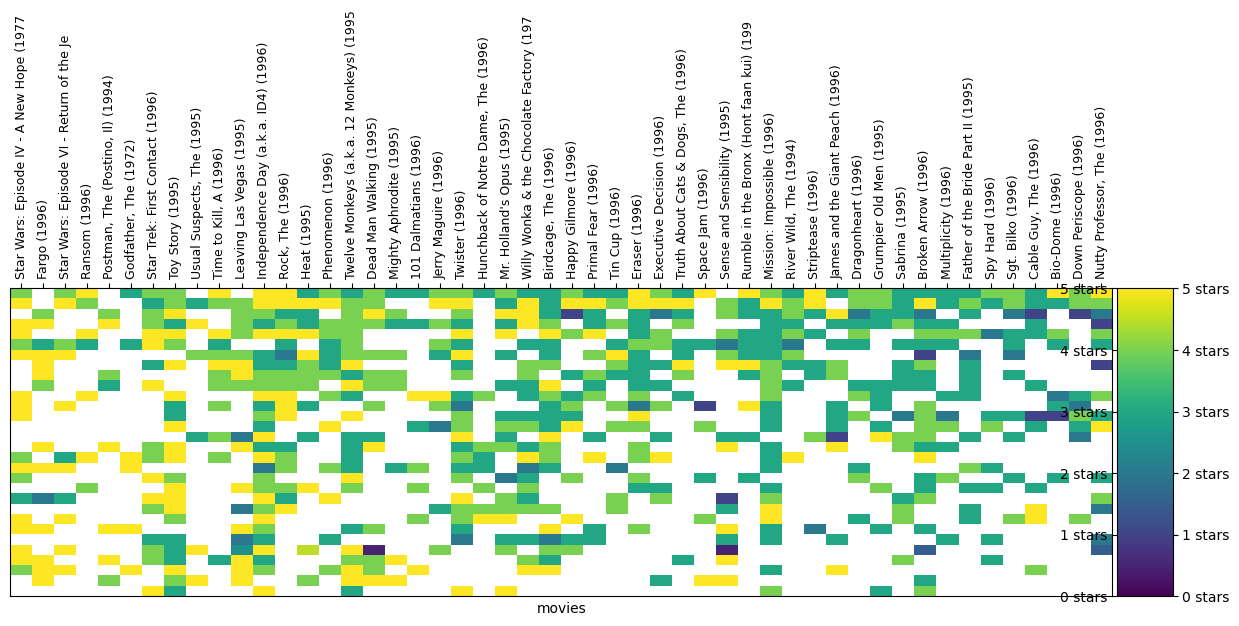

cluster # 9
# of users in cluster: 16. # of users in plot: 16


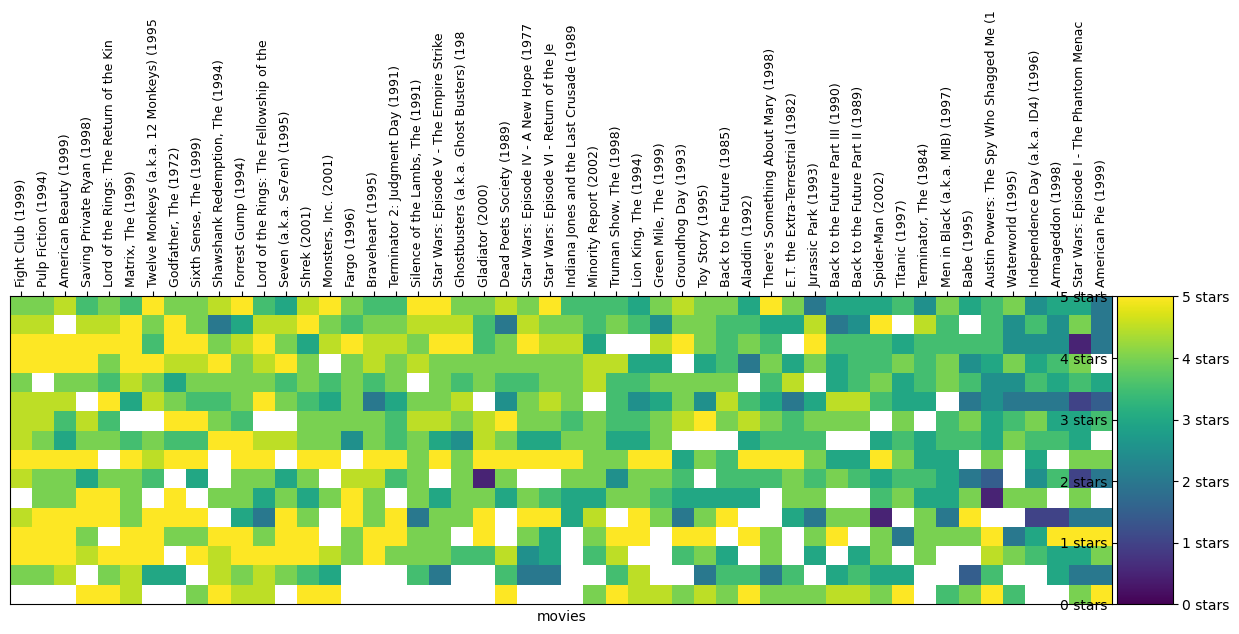

cluster # 7
# of users in cluster: 10. # of users in plot: 10


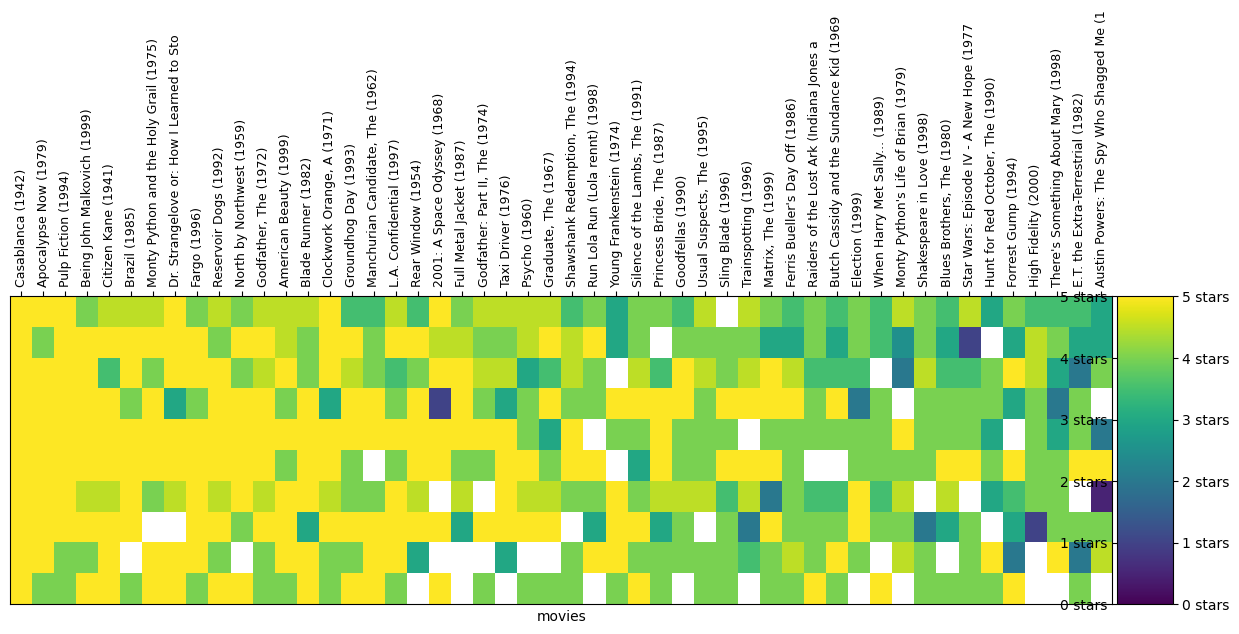

In [26]:
max_users = 70
max_movies = 50

clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
helper.draw_movie_clusters(clustered, max_users, max_movies)


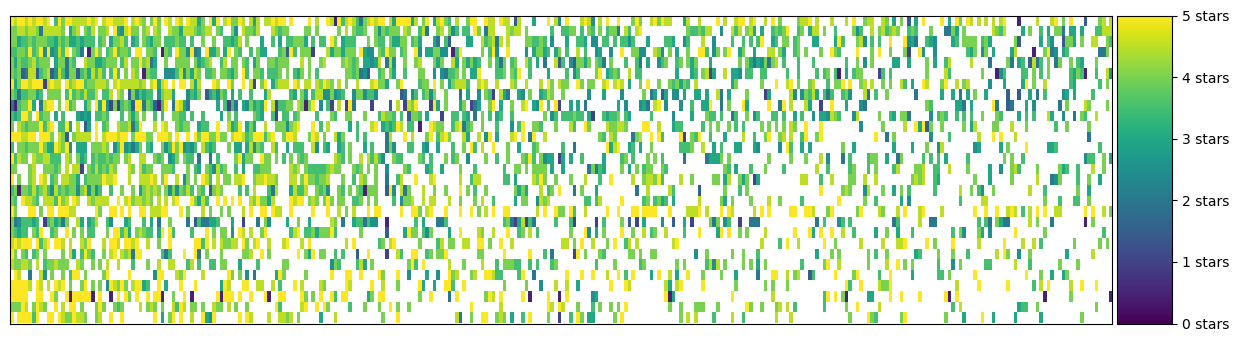

In [27]:

cluster_number = 1

# Let's filter to only see the region of the dataset with the most number of values 
n_users = 75
n_movies = 300
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)

cluster = helper.sort_by_rating_density(cluster, n_movies, n_users)
helper.draw_movies_heatmap(cluster, axis_labels=False)


In [28]:
cluster.fillna('').head()


,"Matrix, The (1999)",X-Men (2000),Pirates of the Caribbean: The Curse of the Black Pearl (2003),"Lord of the Rings: The Return of the King, The (2003)","Lord of the Rings: The Two Towers, The (2002)",Star Wars: Episode IV - A New Hope (1977),Forrest Gump (1994),"Lord of the Rings: The Fellowship of the Ring, The (2001)","Dark Knight, The (2008)",Shrek (2001),...,Pretty Woman (1990),Brave (2012),Mars Attacks! (1996),"Shining, The (1980)",Dark City (1998),How to Train Your Dragon (2010),"Me, Myself & Irene (2000)",There's Something About Mary (1998),Edge of Tomorrow (2014),Kick-Ass (2010)
26,5.0,4.5,5.0,5.0,4.5,5.0,4.5,5.0,5.0,4.5,...,,,1.5,,,,4.0,4.5,,4.5
25,4.0,4.0,4.5,4.5,4.0,4.5,4.5,4.0,2.0,4.5,...,,3.0,,,,3.5,3.5,4.5,4.5,4.5
28,4.0,4.0,3.0,3.5,3.5,4.0,3.5,4.0,4.0,4.0,...,,4.0,,,4.5,4.5,,,4.0,3.5
3,3.5,3.5,4.0,4.0,3.5,5.0,3.5,4.0,5.0,2.5,...,,,,,,,2.0,2.0,4.0,
14,4.0,3.0,4.0,3.5,3.5,4.0,4.5,3.5,4.0,4.0,...,3.5,3.0,,,,4.0,,,,


In [29]:
movie_name = 'Forrest Gump (1994)'

cluster[movie_name].mean()


4.130434782608695

In [30]:
# The average rating of 20 movies as rated by the users in the cluster
cluster.mean().head(20)


Matrix, The (1999)                                               4.250000
X-Men (2000)                                                     3.760000
Pirates of the Caribbean: The Curse of the Black Pearl (2003)    3.900000
Lord of the Rings: The Return of the King, The (2003)            4.220000
Lord of the Rings: The Two Towers, The (2002)                    4.080000
Star Wars: Episode IV - A New Hope (1977)                        4.270833
Forrest Gump (1994)                                              4.130435
Lord of the Rings: The Fellowship of the Ring, The (2001)        4.108696
Dark Knight, The (2008)                                          4.195652
Shrek (2001)                                                     3.782609
Star Wars: Episode V - The Empire Strikes Back (1980)            4.347826
Kill Bill: Vol. 2 (2004)                                         3.931818
Gladiator (2000)                                                 3.886364
Star Wars: Episode VI - Return of the 

In [31]:
user_id = 3

# 假设你已经选择了一个用户 ID 并将其赋值给了 user_id

# 获取选定用户的所有评分
user_2_ratings = cluster.loc[user_id, :]

# 找出用户没有评分的电影
user_2_unrated_movies = user_2_ratings[user_2_ratings.isnull()]

# 找出这些电影的平均评分
avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:, 0]

# 按照评分排序，推荐评分最高的前 20 部电影
top_20_recommendations = avg_ratings.sort_values(ascending=False)[:20]

# 输出推荐结果
print(top_20_recommendations)



Deadpool (2016)                                         4.444444
No Country for Old Men (2007)                           4.444444
Clockwork Orange, A (1971)                              4.250000
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    4.233333
Inglourious Basterds (2009)                             4.230769
Sherlock Holmes: A Game of Shadows (2011)               4.222222
Dark City (1998)                                        4.214286
Interstellar (2014)                                     4.181818
Django Unchained (2012)                                 4.181818
How to Train Your Dragon (2010)                         4.142857
Incredibles, The (2004)                                 4.125000
Pan's Labyrinth (Laberinto del fauno, El) (2006)        4.111111
Jumanji (1995)                                          4.111111
Toy Story 2 (1999)                                      4.100000
Back to the Future Part II (1989)                       4.093750
Harry Potter and the Gobl